In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import ensemble
sns.set(style="ticks")
%matplotlib inline

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#--------  fit_and_plot_dt
# Fit decision tree with on given data set with given depth, and plot the data/model
# Input: 
#      fname (string containing file name)
#      depth (depth of tree)

def fit_and_plot_dt(x, y, depth, title, ax, plot_data=True, fill=True, color='Greens'):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(x, y)

    # PLOT DECISION TREE BOUNDARY
    ax = plot_tree_boundary(x, y, dt, title, ax, plot_data, fill, color)
    
    return ax

In [3]:
#--------  plot_tree_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (the classifier you want to visualize)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_tree_boundary(x, y, model, title, ax, plot_data=True, fill=True, color='Greens'):
    if plot_data:
        # PLOT DATA
        ax.scatter(x[y==1,0], x[y==1,1], c='green')
        ax.scatter(x[y==0,0], x[y==0,1], c='white')
    
    # CREATE MESH
    interval = np.arange(min(x.min(), y.min()),max(x.max(), y.max()),0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1, x2), axis=1)

    # PREDICT ON MESH POINTS
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # PLOT DECISION SURFACE
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    if fill:
        ax.contourf(x1, x2, yy, alpha=0.1, cmap=color)
    else:
        ax.contour(x1, x2, yy, alpha=0.1, cmap=color)
    
    # LABEL AXIS, TITLE
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

In [4]:
data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=200)
data = np.hstack((data, np.zeros((200, 1))))
data[data[:, 0]**2 + data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(data[data[:, 0]**2 + data[:, 1]**2 < 3**2]), p=[0.2, 0.8])

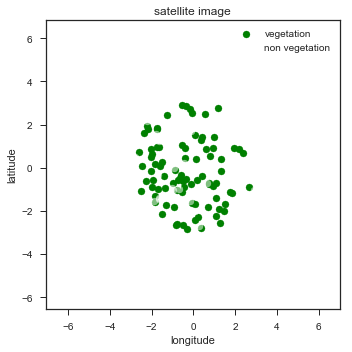

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
x = data[:, :-1]
y = data[:, -1]
ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green', label='vegetation')
ax.scatter(x[y == 0, 0], x[y == 0, 1], c='white', label='non vegetation', alpha=0.5)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('satellite image')
ax.legend()
plt.tight_layout()
plt.show() 

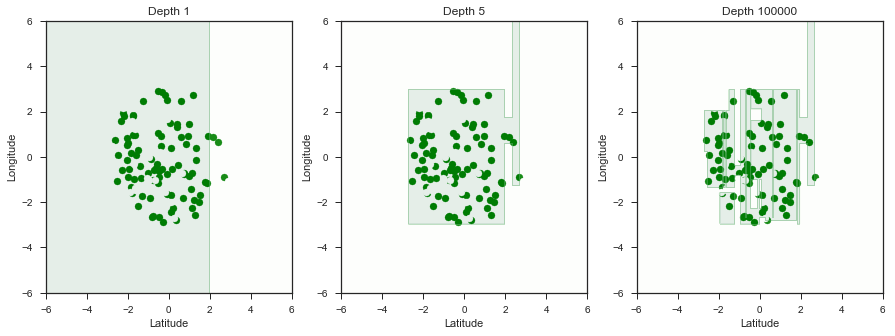

In [6]:
#Different Depths
depths = [1, 5, 100000]
fig, ax = plt.subplots(1, len(depths), figsize=(15, 5))
x = data[:, :-1]
y = data[:, -1]
ind = 0
for i in depths:
    ax[ind] = fit_and_plot_dt(x, y, i, 'Depth {}'.format(i), ax[ind]) 
    ax[ind].set_xlim(-6, 6)
    ax[ind].set_ylim(-6, 6)
    ind += 1    

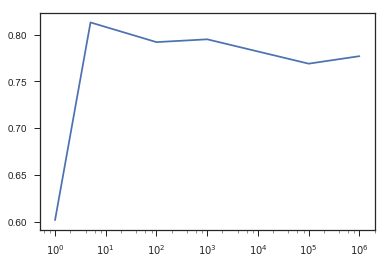

In [7]:
#Overfitting

depths = [1, 5, 100, 1000, 100000, 1000000]

test_data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=1000)
test_data = np.hstack((test_data, np.zeros((1000, 1))))
test_data[test_data[:, 0]**2 + test_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(test_data[test_data[:, 0]**2 + test_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])
x_test = test_data[:, :-1]
y_test = test_data[:, -1]

scores = []
for depth in depths:
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(x, y)
    scores.append(dt.score(x_test, y_test))
    
plt.plot(depths, scores)
plt.xscale('log')



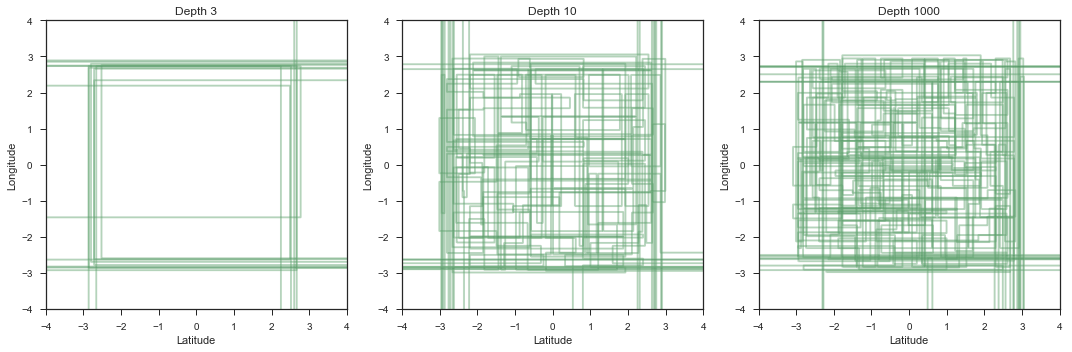

In [8]:
#Variance comparison between simple and complex models
depths = [3, 10, 1000]

fig, ax = plt.subplots(1, len(depths), figsize=(15, 5))

for d in range(len(depths)):
    for i in range(10):
        new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=200)
        new_data = np.hstack((new_data, np.zeros((200, 1))))
        new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])
        x = new_data[:, :-1]
        y = new_data[:, -1]
        ax[d] = fit_and_plot_dt(x, y, depths[d], 'Depth {}'.format(depths[d]), ax[d], plot_data=False, fill=False) 
        ax[d].set_xlim(-4, 4)
        ax[d].set_ylim(-4, 4)
plt.tight_layout()
plt.show() 

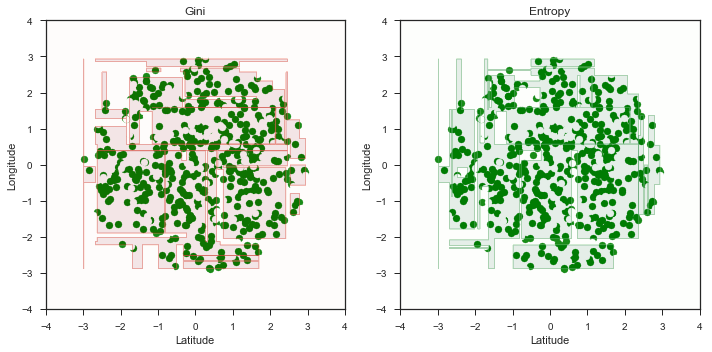

In [9]:
#Different Splitting Criteria
depth = 15

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=1000)
new_data = np.hstack((new_data, np.zeros((1000, 1))))
new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])
x = new_data[:, :-1]
y = new_data[:, -1]

dt = tree.DecisionTreeClassifier(max_depth = depth)
dt.fit(x, y)

ax[0] = plot_tree_boundary(x, y, dt, 'Gini', ax[0], color='Reds')

dt = tree.DecisionTreeClassifier(max_depth = depth, criterion='entropy')
dt.fit(x, y)

ax[1] = plot_tree_boundary(x, y, dt, 'Entropy', ax[1])


ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)
ax[1].set_xlim(-4, 4)
ax[1].set_ylim(-4, 4)
        
plt.tight_layout()
plt.show() 

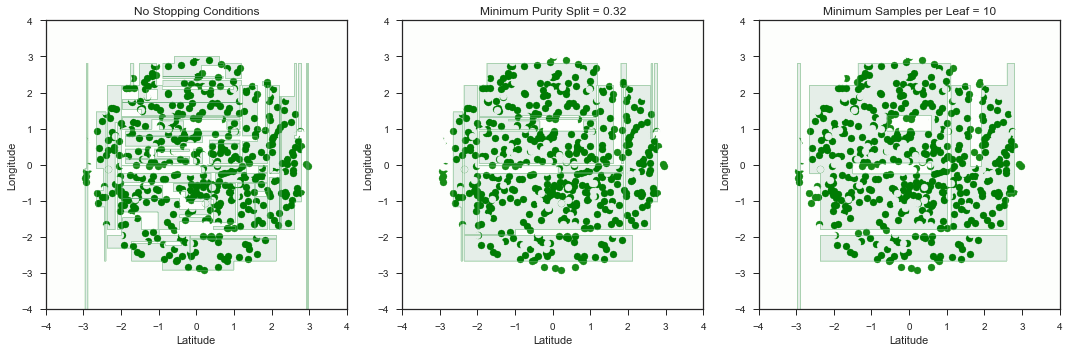

In [10]:
#Different Stopping Conditions

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

new_data = np.random.multivariate_normal([0, 0], np.eye(2) * 5, size=1000)
new_data = np.hstack((new_data, np.zeros((1000, 1))))
new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2, 2] = np.random.choice([0, 1], len(new_data[new_data[:, 0]**2 + new_data[:, 1]**2 < 3**2]), p=[0.2, 0.8])
x = new_data[:, :-1]
y = new_data[:, -1]

dt = tree.DecisionTreeClassifier()
dt.fit(x, y)

ax[0] = plot_tree_boundary(x, y, dt, 'No Stopping Conditions', ax[0])

dt = tree.DecisionTreeClassifier(min_impurity_split=0.32)
dt.fit(x, y)

ax[1] = plot_tree_boundary(x, y, dt, 'Minimum Purity Split = 0.32', ax[1])

dt = tree.DecisionTreeClassifier(min_samples_leaf=10)
dt.fit(x, y)

ax[2] = plot_tree_boundary(x, y, dt, 'Minimum Samples per Leaf = 10', ax[2])

ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)
ax[1].set_xlim(-4, 4)
ax[1].set_ylim(-4, 4)
ax[2].set_xlim(-4, 4)
ax[2].set_ylim(-4, 4)      

plt.tight_layout()
plt.show() 